## PCA not using any framework


Reference to this book. : Ethem Alpaydın Introduction to Machine Learning, third edition

PCA software diagram is as follows


<img src="https://i.imgur.com/KQW2YMp.png" width="px">

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
print(os.listdir("../input"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
train_all = pd.read_csv("../input/train.csv")

In [3]:
train_no_deleted = train_all
labels = train_all["label"]
train_all = train_all.drop(labels = ["label"],axis = 1) 
train_mean = train_all.mean(axis = 0)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

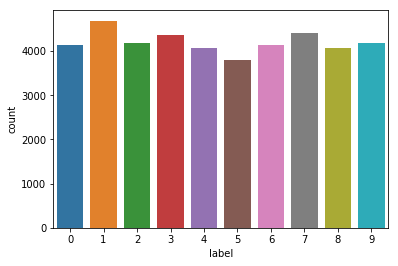

In [4]:
g = sns.countplot(labels)
labels.value_counts()

In [5]:
train_all, test_all, labels, test_labels = train_test_split(train_all, labels, test_size = 0.1,random_state=0)

In [6]:
train_all = train_all.reset_index(drop=True)
labels = labels.reset_index(drop=True)
test_all = test_all.reset_index(drop=True)
test_labels = test_labels.reset_index(drop=True)

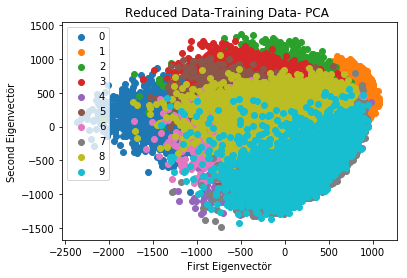

In [7]:
train_mean = train_all.mean(axis = 0)
train_zero = train_all-train_mean 
cov = ((train_all-train_all.mean(axis=0)).T).dot((train_all-train_all.mean(axis=0)))/train_all.shape[0]
values, vectors = np.linalg.eig(cov)

loss_of_information = 1-sum(values[0:2])/sum(values[:])
z1 = np.dot(train_zero, vectors[:,0])
z2 = np.dot(train_zero, vectors[:,1])

for i in range(10):
    z1_digits = z1[labels==i]
    z2_digits = z2[labels==i]
    plt.scatter(z1_digits,z2_digits,label =""+str(i))
plt.title('Reduced Data-Training Data- PCA ')
plt.xlabel('First Eigenvectör')
plt.ylabel('Second Eigenvectör')
plt.legend()



In [8]:
test_mean = test_all.mean(axis = 0)
test_zero_mean = test_all-train_mean
test_z1 = np.dot(test_zero_mean, vectors[:,0])
test_z2 = np.dot(test_zero_mean, vectors[:,1])
success_cnt = 0 
for k in range(test_z1.shape[0]):
    distance =[]
    distance_1 = test_z1[k]-z1
    distance_2 = test_z2[k]-z2
    distance = distance_1*distance_1+distance_2*distance_2
    if(labels[np.argmin(distance)] == test_labels[k]):
        success_cnt = success_cnt+1 

test_error_PCA = 1-(success_cnt/test_all.shape[0])
print('Q2-PCA Test Error')
print(test_error_PCA)


Q2-PCA Test Error
0.6176190476190476
